# STAT 207 Final Project

The project is designed to test students understanding of computational algorithms, programming, data analysis, and writing skills. 

The report is expected to be done in jupyter notebook, with both code and markdown text. In the report, you should have the following sections:

- **Introduction:** of the problem, what data you have, what method you plan to use, and how would you evaluate the results.

- **Methods:** detailed implementation of the method(s). You are allowed to use basic `numpy` and `linalg` functions, but required to implement the method/algorithm by hand.

- **Results:** present the results using graphs or tables in a clear and concise way.

- **Conclusion:** a brief conclusion of the project.

Students are randomly assigned to one of the three projects as below and should complete their respective one independently:

- **Healthcare:** Predicting high medical costs using quantile regression.  
- **Image Analysis:** Clothing image classification using custom models on the Fashion-MNIST dataset.  
- **Public Policy:** Crime rate prediction and variable selection using Lasso regression implemented from scratch.

Group 1:

- Olawole, Alice
- Wu, Yifan
- Li, Chuanman
- Zhou, Bufan
- Lin, Ying
- Nandagiri, Kaushal
- Wang, Kaiming

Group 2:

- FallahiFard, Behzad
- Saxena, Kritik
- Liu, Yuxin
- Lopez, Nancy
- Jones, Nathalie
- Lin, Pei-Ling

Group 3:

- Yang, Chenguang
- Xue, Yijia
- Liu, Linlin
- Tang, Luhan
- Qu, Xinhao
- Lee, Wonkeun

## 1. Healthcare: Predicting High Medical Costs with Quantile Regression

**Problem:**

Healthcare expenditures are highly skewed, with a small subset of patients incurring extremely high costs. The goal of this project is to build a model that identifies factors associated with high medical insurance charges and accurately predicts the upper end of the cost distribution (e.g., the median or 90th percentile). Unlike mean regression, quantile regression captures the impact of covariates on different points of the cost distribution, providing more insight for skewed outcomes.

**Dataset:**

Use the [Medical Cost Personal Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance) available on Kaggle. This dataset contains 1,339 records with features such as age, BMI, smoking status, etc., along with the billed medical insurance charges.

**Relevant Methods:**

- **Quantile Regression:** Implement quantile regression (e.g., median or 90th-percentile regression) using a formulation that minimizes the pinball loss. Explore solving this via linear programming techniques.
- **Resampling Methods:** Apply bootstrap resampling to estimate the variability of your regression coefficients and use cross-validation to assess predictive performance.

**Expected Deliverables:**

- **Code:** A well-documented implementation (in Python or R) that performs quantile regression, resampling, and model evaluation.
- **Report:** A concise report including:
  - Data exploration and visualization (e.g., distribution of costs, identification of skewness).
  - Methodology for quantile regression and details of the optimization approach.
  - Visual comparisons between predicted and actual costs, as well as plots showing the effect of features across different quantiles.
- **Conclusion:** Insights into which factors most influence high medical costs and discussion of model performance, with potential comparisons to ordinary least squares regression.


In [2]:
import pandas as pd

# Load the dataset directly from GitHub mirror (alternative if Kaggle requires API auth)
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)

# Preview the dataset
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
import pandas as pd
import statsmodels.formula.api as smf


# Convert categorical variables to category dtype
df["sex"] = df["sex"].astype("category")
df["smoker"] = df["smoker"].astype("category")
df["region"] = df["region"].astype("category")

# Fit quantile regression model at tau = 0.5 (median)
model_50 = smf.quantreg("charges ~ age + sex + bmi + children + smoker + region", data=df)
res_50 = model_50.fit(q=0.5)

# Fit quantile regression model at tau = 0.9
res_90 = model_50.fit(q=0.9)

# Print summaries
print("Quantile Regression Results (tau = 0.5):")
print(res_50.summary())

print("\nQuantile Regression Results (tau = 0.9):")
print(res_90.summary())

Quantile Regression Results (tau = 0.5):
                         QuantReg Regression Results                          
Dep. Variable:                charges   Pseudo R-squared:               0.5921
Model:                       QuantReg   Bandwidth:                       431.0
Method:                 Least Squares   Sparsity:                        2373.
Date:                Sat, 14 Jun 2025   No. Observations:                 1338
Time:                        22:47:32   Df Residuals:                     1329
                                        Df Model:                            8
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -4404.6758    193.325    -22.784      0.000   -4783.931   -4025.420
sex[T.male]          -464.2943     65.160     -7.125      0.000    -592.123    -336.466
smoker[T.yes]        3.122e+04     80.858    386.094  

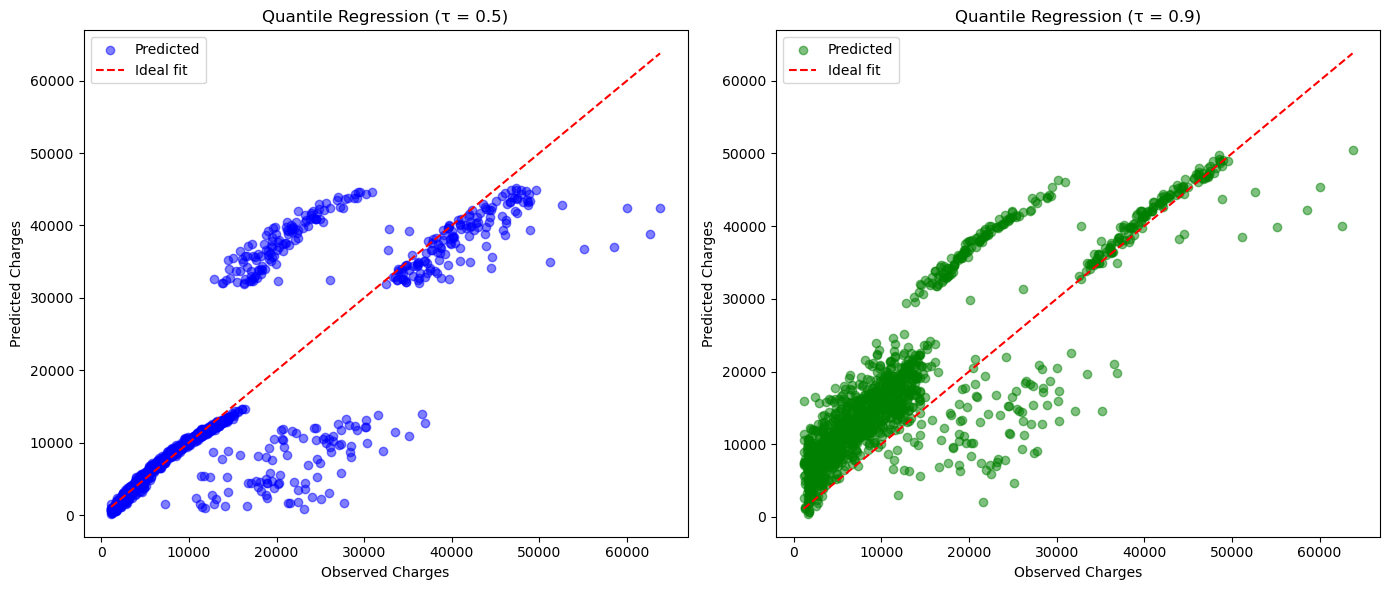

In [4]:
import matplotlib.pyplot as plt

# Predicted values
df["pred_50"] = res_50.predict(df)
df["pred_90"] = res_90.predict(df)

# Plot predicted vs observed for tau=0.5 and tau=0.9
plt.figure(figsize=(14, 6))

# Tau = 0.5
plt.subplot(1, 2, 1)
plt.scatter(df["charges"], df["pred_50"], alpha=0.5, color='blue', label="Predicted")
plt.plot([df["charges"].min(), df["charges"].max()],
         [df["charges"].min(), df["charges"].max()],
         color='red', linestyle='--', label="Ideal fit")
plt.xlabel("Observed Charges")
plt.ylabel("Predicted Charges")
plt.title("Quantile Regression (τ = 0.5)")
plt.legend()

# Tau = 0.9
plt.subplot(1, 2, 2)
plt.scatter(df["charges"], df["pred_90"], alpha=0.5, color='green', label="Predicted")
plt.plot([df["charges"].min(), df["charges"].max()],
         [df["charges"].min(), df["charges"].max()],
         color='red', linestyle='--', label="Ideal fit")
plt.xlabel("Observed Charges")
plt.ylabel("Predicted Charges")
plt.title("Quantile Regression (τ = 0.9)")
plt.legend()

plt.tight_layout()
plt.show()

## 2. Fashion Product Image Classification and Analysis

A major online fashion retailer wants to automate the categorization of product images—such as distinguishing T-shirts, shoes, and bags—using machine learning. Automating this classification process would improve search relevance and inventory tagging at scale.

In this project, you will analyze a large image dataset, train a classifier to predict item categories, and evaluate its performance. You will begin with simple linear models and may optionally explore more complex models like neural networks. The goal is to learn how to build and interpret classification models from raw image data, and to understand which categories are easier or harder to classify.

We will use the Fashion-MNIST dataset, which contains 70,000 grayscale images (28×28 pixels) of clothing items, labeled into 10 categories. **Use a random subset of 7,000 images if you have trouble handling 70,000 images.**


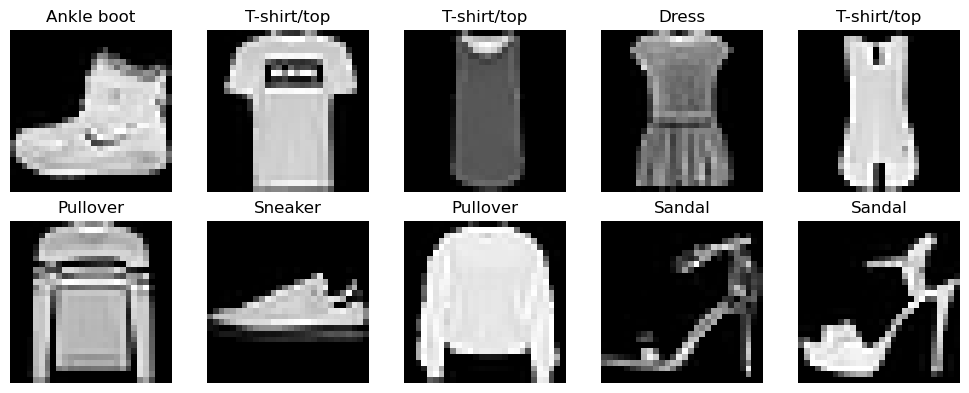

In [9]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Combine into a full dataset if needed
X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

# Class labels for reference
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Preview some images
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X[i], cmap="gray")
    plt.title(class_names[y[i]])
    plt.axis("off")
plt.tight_layout()
plt.show()


- **Modeling Approaches:**
  - **Linear Models:** Implement *logistic regression* and *linear SVM*. Reshape each image to a 784-dimensional vector (28×28) and normalize pixel values to [0, 1].
  - **Evaluation Metrics:** Use classification accuracy, per-class accuracy, and a confusion matrix to evaluate model performance.

- **Error Analysis:**
  - Examine which categories are most frequently confused.
  - Visualize correctly vs. incorrectly predicted examples.
  - Analyze patterns in the misclassifications (e.g., shirt vs. coat).

- **Extensions (Optional):**
  - Try dimensionality reduction (e.g., PCA) before modeling.

**Expected Deliverables**

- **Code:** A complete Python notebook that:
  - Loads and explores the Fashion-MNIST dataset.
  - Preprocesses the images appropriately.
  - Implements and trains one or more classification models.
  - Evaluates model accuracy and presents a confusion matrix.
  - Performs visual error analysis.

- **Report Sections (Markdown):**
  - **Data Exploration:** Show class counts and visualizations of sample items. Highlight skewness or imbalance if present.
  - **Methodology:** Explain the model(s) you used, how data was reshaped or normalized, and how model training was performed.
  - **Results:** Present tables or plots of test accuracy, confusion matrix, and per-class performance. Include visuals of correct and incorrect predictions.
  - **Conclusion:** Summarize which model performed best, which classes were easiest/hardest to predict, and suggest possible improvements.

## 3. Implementing Lasso Regression from Scratch for Crime Rate Prediction

Crime Analysis: Implementing Lasso Regression from Scratch

**Problem:**

You are working with a public policy team to analyze factors that influence violent crime rates in different U.S. communities. Your goal is to build a predictive model for the violent crime rate using a large number of socio-economic and demographic variables. To identify the most relevant predictors and avoid overfitting, you will implement **Lasso Regression** from scratch using **coordinate descent**, and perform model selection using **cross-validation**.

**Dataset:**

Use the **Communities and Crime** dataset from the UCI Machine Learning Repository. This dataset includes 1,994 communities with 122 features (e.g., population demographics, education, police data) and one target variable: **violent crimes per capita**.

You should:
- Remove non-numeric or identifier columns (e.g., community name, state).
- Handle missing values by dropping rows or simple imputation.
- Standardize the features (zero mean, unit variance) before modeling.


In [10]:
import pandas as pd
import numpy as np
import requests
from io import StringIO

# Download the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data"
response = requests.get(url)
raw_data = response.text

# Load data using header file
header_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.names"
header_lines = requests.get(header_url).text.split("\n")
column_names = [line.split()[1] for line in header_lines if line.startswith("@attribute")]

# Read CSV
data = pd.read_csv(StringIO(raw_data), header=None, names=column_names, na_values='?')

# Drop non-numeric identifier columns
data = data.drop(columns=["state", "county", "community", "communityname", "fold"])

print(data.shape)
# Separate features and target
X = data.drop(columns=["ViolentCrimesPerPop"])
y = data["ViolentCrimesPerPop"]


(1994, 123)


### Modeling Approach:
- **Lasso Regression**: Implement from scratch using coordinate descent with soft-thresholding.
- **Model Selection**: Use K-fold cross-validation with MSE to choose the optimal lambda (regularization strength).
- **Evaluation Metrics**: Report RMSE or R² on the test set or averaged from cross-validation.
- **Interpretation**: List and interpret the selected (non-zero) features.

### Expected Deliverables:
- **Code**: A full Jupyter Notebook that:
  - Loads and preprocesses the dataset.
  - Implements Lasso regression from scratch using coordinate descent.
  - Uses cross-validation to find the optimal lambda.
  - Evaluates model performance.
  - Identifies and interprets selected variables.
  
- **Report Sections (Markdown)**:
  - **Introduction**: Describe the problem, dataset, method, and evaluation plan.
  - **Methods**: Detail your implementation of the Lasso algorithm and model selection strategy.
  - **Results**: Present performance metrics, optimal lambda, and selected features using tables or plots.
  - **Conclusion**: Summarize key findings and interpret the important predictors of crime.